In [103]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [104]:
df = pd.read_csv('E:Datasets/bank-marketing.csv',)

In [105]:
df.head()

,age,job,salary,marital,education,targeted,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response
0,58,management,100000,married,tertiary,yes,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,60000,single,secondary,yes,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,120000,married,secondary,yes,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,20000,married,unknown,no,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,0,single,unknown,no,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [106]:
df.columns

Index(['age', 'job', 'salary', 'marital', 'education', 'targeted', 'default',
       'balance', 'housing', 'loan', 'contact', 'day', 'month', 'duration',
       'campaign', 'pdays', 'previous', 'poutcome', 'response'],
      dtype='object')

In [107]:
df.shape

(45211, 19)

In [108]:
df.isnull().sum()

age          0
job          0
salary       0
marital      0
education    0
targeted     0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
response     0
dtype: int64

In [109]:
for col in df.columns:
    print(col)
    print(df[col].unique())
    print('__________________________________________________________')

age
[58 44 33 47 35 28 42 43 41 29 53 57 51 45 60 56 32 25 40 39 52 46 36 49
 59 37 50 54 55 48 24 38 31 30 27 34 23 26 61 22 21 20 66 62 83 75 67 70
 65 68 64 69 72 71 19 76 85 63 90 82 73 74 78 80 94 79 77 86 95 81 18 89
 84 87 92 93 88]
__________________________________________________________
job
['management' 'technician' 'entrepreneur' 'blue-collar' 'unknown'
 'retired' 'admin.' 'services' 'self-employed' 'unemployed' 'housemaid'
 'student']
__________________________________________________________
salary
[100000  60000 120000  20000      0  55000  50000  70000   8000  16000
   4000]
__________________________________________________________
marital
['married' 'single' 'divorced']
__________________________________________________________
education
['tertiary' 'secondary' 'unknown' 'primary']
__________________________________________________________
targeted
['yes' 'no']
__________________________________________________________
default
['no' 'yes']
___________________________

#### Describe the pdays column, make note of the mean, median and minimum values. Anything fishy in the values?

p-days : number of days that passed by after the client was last contacted from a previous campaign 

In [110]:
df['pdays'].value_counts()

-1      36954
 182      167
 92       147
 183      126
 91       126
        ...  
 749        1
 717        1
 589        1
 493        1
 32         1
Name: pdays, Length: 559, dtype: int64

Since, pdays is the number of times the client was contacted and the values of pdays can only be positive values. So, we will filter all the values which are less than 0. And, in our pdays column we have -1 value which is not correct. 

In [111]:
df['pdays'].min()

-1

In [112]:
df['pdays'].median()

-1.0

In [113]:
df['pdays'].mean()

40.19782796222158

In [114]:
len(df)

45211

#### Describe the pdays column again, this time limiting yourself to the relevant values of pdays. How different are the mean and the median values?

In [115]:
len (df[df['pdays'] > 400] ) / len(df) * 100

0.5175731569750724

'pdays' holds the number of days that passed by after the client was last contacted from a previous campaign Looking closer into 'pdays' data we can see that:
* only 0.5% of values above 400. They are possibly outliers, so we should consider imputing something (possibly mean value) instead of these values.
* -1 possibly means that the client wasn't contacted before or stands for missing data.

Since we are not sure exactly what -1 means I suggest to drop this column, because -1 makes more than 50% of the values of the column.

In [116]:
df.drop(columns = ['pdays'], axis = 0, inplace = True)

#### Plot a horizontal bar graph with the median values of balance for each education level value. Which group has the highest median?

In [117]:
bal_edu = pd.pivot_table(data = df,values = 'balance', index = 'education', aggfunc= 'median').reset_index()

bal_edu

,education,balance
0,primary,403
1,secondary,392
2,tertiary,577
3,unknown,568


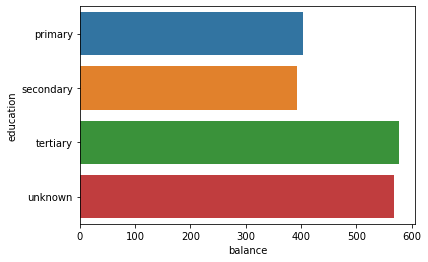

In [118]:
sns.barplot(x = 'balance',y = 'education', data = bal_edu)
plt.show()

#### Are the features about the previous campaign data useful?

In [119]:
len (df[df['previous'] > 34] ) / len(df) * 100

0.024330362080024773

In [120]:
df.previous.value_counts()[:5]

0    36954
1     2772
2     2106
3     1142
4      714
Name: previous, dtype: int64

'previous' holds the number of contacts performed before this campaign and for this client (numeric).

There are approxiamately 80% rows with zero entries in previous columns and replacing it with some statistic measure will of no use. So we will drop previous column from the data. 

In [121]:
df.drop('previous', axis = 1, inplace = True)

#### Make suitable plots for associations with numerical features and categorical features’

In [122]:
df.head()

,age,job,salary,marital,education,targeted,default,balance,housing,loan,contact,day,month,duration,campaign,poutcome,response
0,58,management,100000,married,tertiary,yes,no,2143,yes,no,unknown,5,may,261,1,unknown,no
1,44,technician,60000,single,secondary,yes,no,29,yes,no,unknown,5,may,151,1,unknown,no
2,33,entrepreneur,120000,married,secondary,yes,no,2,yes,yes,unknown,5,may,76,1,unknown,no
3,47,blue-collar,20000,married,unknown,no,no,1506,yes,no,unknown,5,may,92,1,unknown,no
4,33,unknown,0,single,unknown,no,no,1,no,no,unknown,5,may,198,1,unknown,no


In [123]:
df.marital.unique()

array(['married', 'single', 'divorced'], dtype=object)

In [124]:
df.shape

(45211, 17)

C:\Users\admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


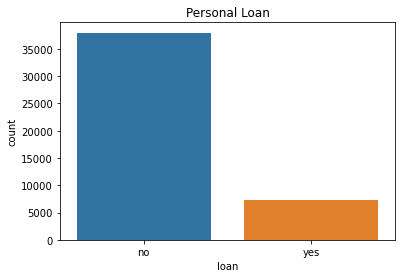

In [125]:
sns.countplot(df['loan'])
plt.title('Personal Loan')
plt.show()

C:\Users\admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


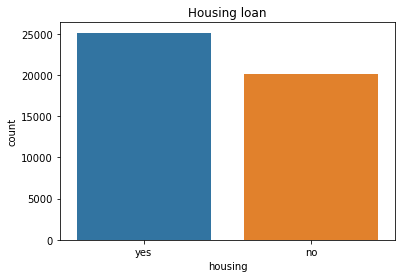

In [126]:
sns.countplot(df['housing'])
plt.title('Housing loan')
plt.show()

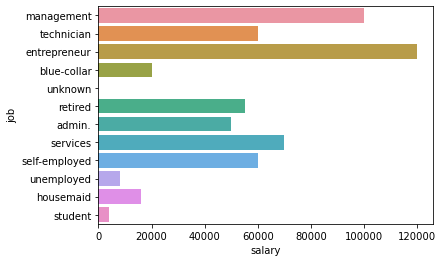

In [127]:
sns.barplot(y = 'job', x = 'salary',data = df )
plt.show()

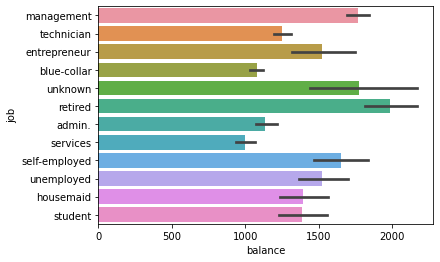

In [128]:
sns.barplot(y ='job', x = 'balance', data = df)
plt.show()

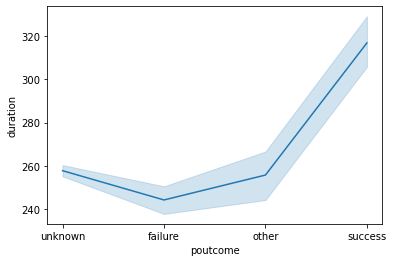

In [129]:
sns.lineplot(x = 'poutcome', y = 'duration', data = df)
plt.show()

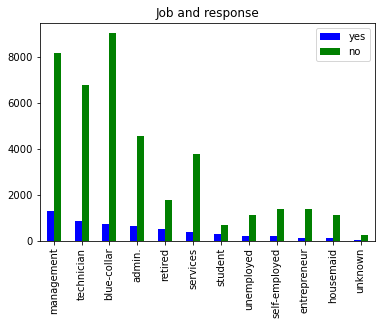

In [130]:
#job and deposit
df1 = pd.DataFrame()

df1['yes'] = df[df['response'] == 'yes']['job'].value_counts()
df1['no'] = df[df['response'] == 'no']['job'].value_counts()

df1.plot.bar(title = 'Job and response', color = ['blue', 'green'])
plt.show()

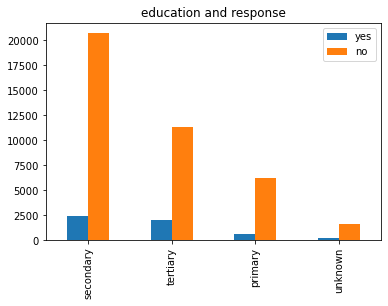

In [131]:
df1 = pd.DataFrame()
df1['yes'] = df[df['response'] == 'yes']['education'].value_counts()
df1['no'] = df[df['response']== 'no']['education'].value_counts()
df1.plot.bar(title = 'education and response')
plt.show()

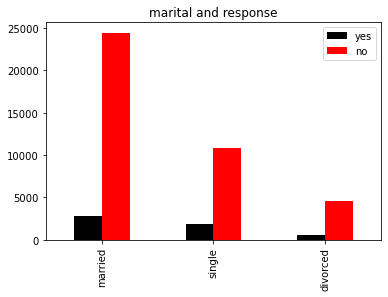

In [132]:
df1 = pd.DataFrame()
df1['yes'] = df[df['response'] == 'yes']['marital'].value_counts()
df1['no'] = df[df['response']== 'no']['marital'].value_counts()
df1.plot.bar(title = 'marital and response', color = ['black', 'red'])
plt.show()

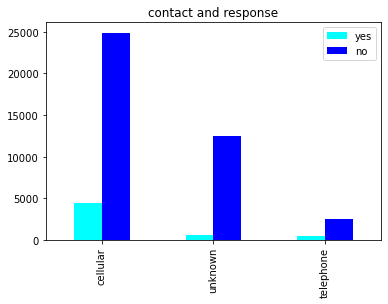

In [133]:
df1 = pd.DataFrame()
df1['yes'] = df[df['response'] == 'yes']['contact'].value_counts()
df1['no'] = df[df['response']== 'no']['contact'].value_counts()
df1.plot.bar(title = 'contact and response',color = ['cyan','blue'])
plt.show()

#### Convert the response variable to a convenient form

In [134]:
df['response'] = df['response'].map({'yes': 1, 'no': 0}) 

#### Extracting Features and Columns

In [135]:
X = df.drop('response', axis = 1)
y = df['response']

#### All the features should be numeric

In [136]:
X = pd.get_dummies(data = X, drop_first= True)

####  Train Test Split

In [137]:
from sklearn.model_selection import train_test_split

In [138]:
X_train,X_test, y_train,y_test = train_test_split(X,y, test_size = 0.3, random_state = 10, stratify = y)

In [139]:
print(f'X_train shape : {X_train.shape} \nX_test shape : {X_test.shape} \ny_train shape : {y_train.shape}\ny_test shape : {y_test.shape}')

X_train shape : (31647, 42) 
X_test shape : (13564, 42) 
y_train shape : (31647,)
y_test shape : (13564,)


#### Features should be of same scale

In [140]:
X.describe()

,age,salary,balance,day,duration,campaign,job_blue-collar,job_entrepreneur,job_housemaid,job_management,...,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success,poutcome_unknown
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,...,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,57006.171065,1362.272058,15.806419,258.163080,2.763841,0.215257,0.032890,0.027427,0.209197,...,0.152507,0.118135,0.010551,0.304483,0.087810,0.016323,0.012807,0.040698,0.033421,0.817478
std,10.618762,32085.718415,3044.765829,8.322476,257.527812,3.098021,0.411005,0.178351,0.163326,0.406740,...,0.359516,0.322771,0.102174,0.460193,0.283022,0.126718,0.112441,0.197592,0.179735,0.386278
min,18.000000,0.000000,-8019.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,33.000000,20000.000000,72.000000,8.000000,103.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,39.000000,60000.000000,448.000000,16.000000,180.000000,2.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,48.000000,70000.000000,1428.000000,21.000000,319.000000,3.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,95.000000,120000.000000,102127.000000,31.000000,4918.000000,63.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [141]:
from sklearn.preprocessing import MinMaxScaler

In [142]:
scale = MinMaxScaler()

In [143]:
X_train = scale.fit_transform(X_train)
X_test = scale.transform(X_test)

# Predictive model 1: Logistic Regression

#### Feature Selection : RFE , VIF AND P-VALUES

In [144]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

In [145]:
model = LogisticRegression()

In [146]:
rfe = RFE(model , n_features_to_select= 20)

In [147]:
rfe.fit(X_train,y_train)

C:\Users\admin\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\admin\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

RFE(estimator=LogisticRegression(), n_features_to_select=20)

In [148]:
rfe.support_

array([False, False,  True, False,  True,  True, False, False,  True,
       False, False, False, False,  True, False, False, False, False,
       False, False, False, False, False, False,  True,  True, False,
        True,  True,  True,  True,  True,  True, False,  True,  True,
        True,  True,  True,  True,  True, False])

In [149]:
filterCol = X.columns[rfe.support_]
filterCol

Index(['balance', 'duration', 'campaign', 'job_housemaid', 'job_student',
       'housing_yes', 'loan_yes', 'contact_unknown', 'month_aug', 'month_dec',
       'month_feb', 'month_jan', 'month_jul', 'month_mar', 'month_may',
       'month_nov', 'month_oct', 'month_sep', 'poutcome_other',
       'poutcome_success'],
      dtype='object')

In [150]:
X_train

array([[0.22077922, 0.58333333, 0.07679807, ..., 0.        , 0.        ,
        0.        ],
       [0.18181818, 0.5       , 0.07323008, ..., 0.        , 0.        ,
        1.        ],
       [0.50649351, 0.5       , 0.07279429, ..., 0.        , 0.        ,
        1.        ],
       ...,
       [0.15584416, 0.83333333, 0.10125651, ..., 0.        , 0.        ,
        1.        ],
       [0.31168831, 1.        , 0.09322172, ..., 0.        , 0.        ,
        0.        ],
       [0.25974026, 0.83333333, 0.07972146, ..., 0.        , 0.        ,
        1.        ]])

In [151]:
X_train = pd.DataFrame(X_train,  columns = X.columns)
X_test = pd.DataFrame(X_test, columns = X.columns)

In [152]:
X_train = X_train[filterCol]
X_test = X_test[filterCol]

In [153]:
y_train = y_train.reset_index(drop = True)

In [154]:
y_test = y_test.reset_index(drop = True)

In [155]:
import statsmodels.api as sm

In [156]:
logsm = sm.GLM(y_train, X_train, family = sm.families.Binomial())

In [157]:
result = logsm.fit()

In [158]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:               response   No. Observations:                31647
Model:                            GLM   Df Residuals:                    31627
Model Family:                Binomial   Df Model:                           19
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -7959.2
Date:                Mon, 05 Jul 2021   Deviance:                       15918.
Time:                        14:48:30   Pearson chi2:                 1.51e+06
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
balance            -15.8077      0.593    -26.644      0.000     -16.971     -14.645
duration            18.7891      0.363     51.733      0.000      18.077      19.501
campaign            -8.2516      0.784    -10.518      0.000      -9.789      -6.714
job_housemaid       -0.5700      0.144     -3.945      0.000      -0.853      -0.287
job_student          0.3510      0.110      3.192      0.001       0.135       0.567
housing_yes         -1.0382      0.047    -22.106      0.000      -1.130      -0.946
loan_yes            -0.5503      0.069     -8.020      0.000      -0.685      -0.416
contact_unknown     -1.9618      0.071    -27.593      0.000      -2.101      -1.822
month_aug           -1.6366      0.072    -22.598      0.000      -1.778      -1.495
month_dec            0.1037      0.212      0.490      0.624      -0.311       0.518
month_feb           -1.0877      0.084    -12.944      0.000      -1.252      -0.923
month_jan           -2.1001      0.132    -15.868      0.000      -2.359      -1.841
month_jul           -1.6668      0.073    -22.792      0.000      -1.810      -1.523
month_mar            0.8586      0.133      6.454      0.000       0.598       1.119
month_may           -1.0732      0.064    -16.893      0.000      -1.198      -0.949
month_nov           -1.5877      0.086    -18.382      0.000      -1.757      -1.418
month_oct            0.1900      0.119      1.597      0.110      -0.043       0.423
month_sep            0.0004      0.130      0.003      0.998      -0.254       0.255
poutcome_other       0.1653      0.092      1.802      0.072      -0.014       0.345
poutcome_success     2.2465      0.079     28.536      0.000       2.092       2.401
====================================================================================
"""

In [159]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [160]:
VIF = []
for i in list(range(0, X_train.shape[1])):
    VIF.append(variance_inflation_factor(X_train.values,i ))

vif = pd.DataFrame({'Features': X_train.columns, 'VIF': VIF}).sort_values(by = 'VIF', ascending= False)
vif

,Features,VIF
0,balance,5.494893
5,housing_yes,2.758472
14,month_may,2.578139
7,contact_unknown,2.027870
1,duration,1.921488
12,month_jul,1.741996
8,month_aug,1.677486
15,month_nov,1.498233
2,campaign,1.396751
10,month_feb,1.262661


In [161]:
X_train = X_train.drop('month_sep', axis = 1)
X_test = X_test.drop('month_sep', axis = 1)

In [162]:
logsm=sm.GLM(y_train,X_train,family=sm.families.Binomial())
result=logsm.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:               response   No. Observations:                31647
Model:                            GLM   Df Residuals:                    31628
Model Family:                Binomial   Df Model:                           18
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -7959.2
Date:                Mon, 05 Jul 2021   Deviance:                       15918.
Time:                        14:48:32   Pearson chi2:                 1.51e+06
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
balance            -15.8072      0.570    -27.713      0.000     -16.925     -14.689
duration            18.7891      0.363     51.740      0.000      18.077      19.501
campaign            -8.2516      0.784    -10.518      0.000      -9.789      -6.714
job_housemaid       -0.5700      0.144     -3.945      0.000      -0.853      -0.287
job_student          0.3510      0.110      3.196      0.001       0.136       0.566
housing_yes         -1.0383      0.047    -22.166      0.000      -1.130      -0.946
loan_yes            -0.5503      0.069     -8.020      0.000      -0.685      -0.416
contact_unknown     -1.9619      0.071    -27.747      0.000      -2.100      -1.823
month_aug           -1.6366      0.071    -23.057      0.000      -1.776      -1.497
month_dec            0.1037      0.211      0.492      0.623      -0.310       0.517
month_feb           -1.0878      0.083    -13.132      0.000      -1.250      -0.925
month_jan           -2.1001      0.132    -15.961      0.000      -2.358      -1.842
month_jul           -1.6669      0.072    -23.153      0.000      -1.808      -1.526
month_mar            0.8586      0.132      6.498      0.000       0.600       1.118
month_may           -1.0732      0.063    -17.121      0.000      -1.196      -0.950
month_nov           -1.5878      0.085    -18.654      0.000      -1.755      -1.421
month_oct            0.1900      0.118      1.610      0.107      -0.041       0.421
poutcome_other       0.1654      0.092      1.804      0.071      -0.014       0.345
poutcome_success     2.2465      0.078     28.634      0.000       2.093       2.400
====================================================================================
"""

In [163]:
VIF = []
for i in list(range(0, X_train.shape[1])):
    VIF.append(variance_inflation_factor(X_train.values,i ))

vif = pd.DataFrame({'Features': X_train.columns, 'VIF': VIF}).sort_values(by = 'VIF', ascending= False)
vif

,Features,VIF
0,balance,5.325090
5,housing_yes,2.758038
14,month_may,2.543358
7,contact_unknown,2.020585
1,duration,1.917777
12,month_jul,1.715063
8,month_aug,1.647882
15,month_nov,1.475187
2,campaign,1.396751
10,month_feb,1.248065


In [164]:
X_train = X_train.drop('month_oct', axis = 1)
X_test = X_test.drop('month_oct', axis = 1)

In [165]:
logsm=sm.GLM(y_train,X_train,family=sm.families.Binomial())
result=logsm.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:               response   No. Observations:                31647
Model:                            GLM   Df Residuals:                    31629
Model Family:                Binomial   Df Model:                           17
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -7960.4
Date:                Mon, 05 Jul 2021   Deviance:                       15921.
Time:                        14:48:34   Pearson chi2:                 1.50e+06
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
balance            -15.5324      0.543    -28.623      0.000     -16.596     -14.469
duration            18.7899      0.363     51.744      0.000      18.078      19.502
campaign            -8.2772      0.785    -10.551      0.000      -9.815      -6.740
job_housemaid       -0.5641      0.144     -3.912      0.000      -0.847      -0.282
job_student          0.3507      0.110      3.196      0.001       0.136       0.566
housing_yes         -1.0442      0.047    -22.364      0.000      -1.136      -0.953
loan_yes            -0.5492      0.069     -8.006      0.000      -0.684      -0.415
contact_unknown     -1.9741      0.070    -28.083      0.000      -2.112      -1.836
month_aug           -1.6586      0.070    -23.820      0.000      -1.795      -1.522
month_dec            0.0795      0.210      0.378      0.705      -0.333       0.492
month_feb           -1.1093      0.082    -13.574      0.000      -1.270      -0.949
month_jan           -2.1218      0.131    -16.210      0.000      -2.378      -1.865
month_jul           -1.6867      0.071    -23.787      0.000      -1.826      -1.548
month_mar            0.8345      0.131      6.358      0.000       0.577       1.092
month_may           -1.0884      0.062    -17.577      0.000      -1.210      -0.967
month_nov           -1.6105      0.084    -19.190      0.000      -1.775      -1.446
poutcome_other       0.1693      0.092      1.848      0.065      -0.010       0.349
poutcome_success     2.2512      0.078     28.746      0.000       2.098       2.405
====================================================================================
"""

In [166]:
VIF = []
for i in list(range(0, X_train.shape[1])):
    VIF.append(variance_inflation_factor(X_train.values,i ))

vif = pd.DataFrame({'Features': X_train.columns, 'VIF': VIF}).sort_values(by = 'VIF', ascending= False)
vif

,Features,VIF
0,balance,5.099274
5,housing_yes,2.757088
14,month_may,2.506735
7,contact_unknown,2.009361
1,duration,1.914238
12,month_jul,1.682637
8,month_aug,1.612920
15,month_nov,1.447976
2,campaign,1.396611
10,month_feb,1.232147


In [167]:
X_train = X_train.drop('month_dec', axis = 1)
X_test = X_test.drop('month_dec', axis = 1)

In [168]:
logsm=sm.GLM(y_train,X_train,family=sm.families.Binomial())
result=logsm.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:               response   No. Observations:                31647
Model:                            GLM   Df Residuals:                    31630
Model Family:                Binomial   Df Model:                           16
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -7960.5
Date:                Mon, 05 Jul 2021   Deviance:                       15921.
Time:                        14:48:36   Pearson chi2:                 1.50e+06
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
balance            -15.5047      0.537    -28.846      0.000     -16.558     -14.451
duration            18.7924      0.363     51.756      0.000      18.081      19.504
campaign            -8.2690      0.784    -10.547      0.000      -9.806      -6.732
job_housemaid       -0.5641      0.144     -3.913      0.000      -0.847      -0.282
job_student          0.3516      0.110      3.205      0.001       0.137       0.567
housing_yes         -1.0450      0.047    -22.403      0.000      -1.136      -0.954
loan_yes            -0.5493      0.069     -8.007      0.000      -0.684      -0.415
contact_unknown     -1.9756      0.070    -28.151      0.000      -2.113      -1.838
month_aug           -1.6613      0.069    -23.992      0.000      -1.797      -1.526
month_feb           -1.1119      0.081    -13.651      0.000      -1.272      -0.952
month_jan           -2.1244      0.131    -16.251      0.000      -2.381      -1.868
month_jul           -1.6891      0.071    -23.917      0.000      -1.828      -1.551
month_mar            0.8317      0.131      6.347      0.000       0.575       1.089
month_may           -1.0902      0.062    -17.656      0.000      -1.211      -0.969
month_nov           -1.6131      0.084    -19.286      0.000      -1.777      -1.449
poutcome_other       0.1696      0.092      1.852      0.064      -0.010       0.349
poutcome_success     2.2524      0.078     28.792      0.000       2.099       2.406
====================================================================================
"""

In [169]:
VIF = []
for i in list(range(0, X_train.shape[1])):
    VIF.append(variance_inflation_factor(X_train.values,i ))

vif = pd.DataFrame({'Features': X_train.columns, 'VIF': VIF}).sort_values(by = 'VIF', ascending= False)
vif

,Features,VIF
0,balance,5.050322
5,housing_yes,2.756419
13,month_may,2.498870
7,contact_unknown,2.005575
1,duration,1.911939
11,month_jul,1.674417
8,month_aug,1.603270
14,month_nov,1.441322
2,campaign,1.396444
9,month_feb,1.227810


In [170]:
X_train = X_train.drop('poutcome_other', axis = 1)
X_test = X_test.drop('poutcome_other', axis = 1)

In [171]:
logsm=sm.GLM(y_train,X_train,family=sm.families.Binomial())
result=logsm.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:               response   No. Observations:                31647
Model:                            GLM   Df Residuals:                    31631
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -7962.2
Date:                Mon, 05 Jul 2021   Deviance:                       15924.
Time:                        14:48:38   Pearson chi2:                 1.53e+06
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
balance            -15.3584      0.531    -28.927      0.000     -16.399     -14.318
duration            18.7899      0.363     51.761      0.000      18.078      19.501
campaign            -8.2312      0.783    -10.513      0.000      -9.766      -6.697
job_housemaid       -0.5653      0.144     -3.920      0.000      -0.848      -0.283
job_student          0.3567      0.110      3.251      0.001       0.142       0.572
housing_yes         -1.0410      0.047    -22.346      0.000      -1.132      -0.950
loan_yes            -0.5481      0.069     -7.988      0.000      -0.683      -0.414
contact_unknown     -1.9897      0.070    -28.522      0.000      -2.126      -1.853
month_aug           -1.6708      0.069    -24.200      0.000      -1.806      -1.535
month_feb           -1.1115      0.081    -13.640      0.000      -1.271      -0.952
month_jan           -2.1220      0.131    -16.237      0.000      -2.378      -1.866
month_jul           -1.7010      0.070    -24.190      0.000      -1.839      -1.563
month_mar            0.8286      0.131      6.328      0.000       0.572       1.085
month_may           -1.0901      0.062    -17.653      0.000      -1.211      -0.969
month_nov           -1.6169      0.084    -19.345      0.000      -1.781      -1.453
poutcome_success     2.2400      0.078     28.749      0.000       2.087       2.393
====================================================================================
"""

In [172]:
VIF = []
for i in list(range(0, X_train.shape[1])):
    VIF.append(variance_inflation_factor(X_train.values,i ))

vif = pd.DataFrame({'Features': X_train.columns, 'VIF': VIF}).sort_values(by = 'VIF', ascending= False)
vif

,Features,VIF
0,balance,4.986113
5,housing_yes,2.746314
13,month_may,2.497934
7,contact_unknown,1.962157
1,duration,1.911231
11,month_jul,1.661207
8,month_aug,1.596571
14,month_nov,1.440620
2,campaign,1.395957
9,month_feb,1.225907


All the columns values has VIF value < 5 and p-value < 0.05 . 

In [173]:
model = LogisticRegression()

In [174]:
model.fit(X_train,y_train)

LogisticRegression()

In [175]:
y_pred = model.predict(X_test)

#### Estimate the model performance using k fold cross validation

In [176]:
from sklearn.model_selection import KFold, cross_val_score

In [177]:
kfold = KFold(n_splits= 5)

In [178]:
print("Cross-validation scores:\n{}".format( cross_val_score(model, X_train, y_train, cv=kfold)))

Cross-validation scores:
[0.90221169 0.89605055 0.90235424 0.8944541  0.9001422 ]


#### What is the precision, recall, accuracy of your model?

In [179]:
from sklearn.metrics import precision_score, recall_score , accuracy_score

In [180]:
print(f'PRECISION SCORE : {precision_score(y_test,y_pred)}')
print(f'RECALL SCORE : {recall_score(y_test,y_pred)}')
print(f'ACCURACY SCORE : {accuracy_score(y_test,y_pred)}')

PRECISION SCORE : 0.6776034236804565
RECALL SCORE : 0.29930686830497794
ACCURACY SCORE : 0.9013565319964613


#### Which features are the most important from your model?

In [181]:
importances = pd.DataFrame(data={
    'Attribute': X_train.columns,
    'Importance': model.coef_[0]
})
importances = importances.sort_values(by='Importance', ascending=False)

In [182]:
importances

,Attribute,Importance
1,duration,17.746549
15,poutcome_success,2.323654
0,balance,1.225682
12,month_mar,1.151441
4,job_student,0.614173
3,job_housemaid,-0.367326
6,loan_yes,-0.370550
9,month_feb,-0.636230
5,housing_yes,-0.736268
13,month_may,-0.777910


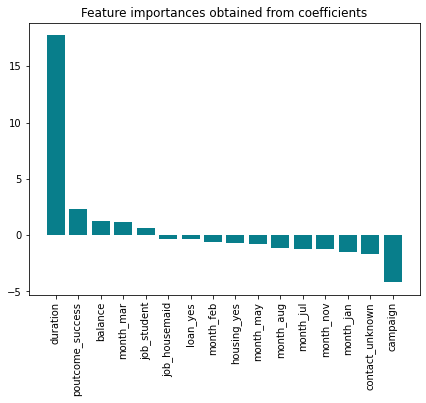

In [187]:
plt.figure(figsize = (7,5))
plt.bar(x=importances['Attribute'], height=importances['Importance'], color='#087E8B')
plt.title('Feature importances obtained from coefficients')
plt.xticks(rotation='vertical')
plt.show()

# Predictive model 2: Random Forest

In [188]:
from sklearn.model_selection import train_test_split

In [189]:
from sklearn.ensemble import RandomForestClassifier

In [190]:
X_train,X_test, y_train,y_test = train_test_split(X,y,test_size = 0.3, stratify = y, random_state = 10)

In [251]:
random = RandomForestClassifier(n_estimators= 50 , max_depth= 18,random_state= 10)

In [252]:
random.fit(X_train,y_train)

RandomForestClassifier(max_depth=18, n_estimators=50, random_state=10)

In [253]:
print(f'Training accuracy score : {random.score(X_train,y_train)}')
print(f'Testing accuracy score : {random.score(X_test,y_test)}')

Training accuracy score : 0.9704553354188391
Testing accuracy score : 0.9049690356826895


#### Estimate the model performance using k fold cross validation

In [254]:
kfold = KFold(n_splits= 5)
print("Cross-validation scores:\n{}".format( cross_val_score(model, X_train, y_train, cv=kfold)))

Cross-validation scores:
[0.88894155 0.88278041 0.888766   0.88623795 0.888766  ]


#### What is the precision, recall, accuracy of your model?

In [255]:
print(f'PRECISION SCORE : {precision_score(y_test,random.predict(X_test))}')
print(f'RECALL SCORE : {recall_score(y_test,random.predict(X_test))}')
print(f'ACCURACY SCORE : {accuracy_score(y_test,random.predict(X_test))}')

PRECISION SCORE : 0.6782296650717703
RECALL SCORE : 0.3572778827977316
ACCURACY SCORE : 0.9049690356826895


#### Using the feature importance values from the Random Forest module, identify the most important features for the model


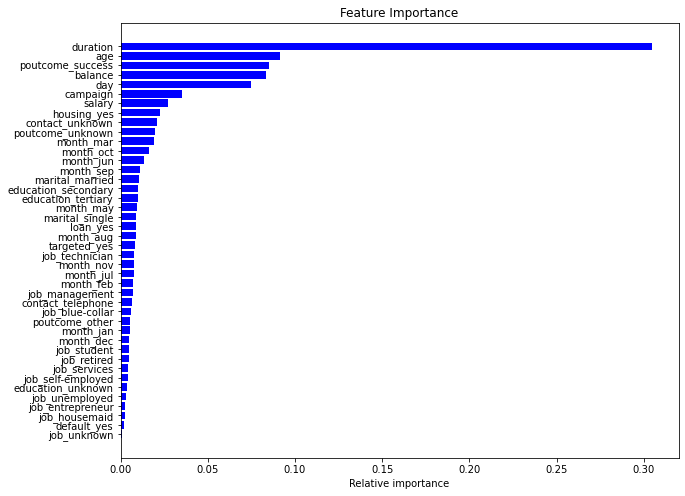

In [256]:
features = X.columns
importance = random.feature_importances_
indices = np.argsort(importance)

plt.figure(figsize = (10,8))
plt.barh(range(len(indices)), importance[indices], color = 'b', align= 'center')
plt.yticks(range(len(indices)), [features[i] for i in indices] )
plt.title('Feature Importance')
plt.xlabel('Relative importance')
plt.show()

# Compare the performance of the Random Forest and the logistic model –

#### Evaluate both models on the test set

In [257]:
print(f'LOGISTIC MODEL ACCURACY SCORE : {accuracy_score(y_test,y_pred)}')
print(f'RANDOM FOREST ACCURACY SCORE : {accuracy_score(y_test,random.predict(X_test))}')

LOGISTIC MODEL ACCURACY SCORE : 0.9013565319964613
RANDOM FOREST ACCURACY SCORE : 0.9049690356826895


#### Which metric did you choose and why?

#### Which model has better performance on the test set?

#### Compare the feature importance from the different models – do they agree? Are the top features similar in both models?